<a href="https://colab.research.google.com/github/yanmintao/cs06_dataviz/blob/main/YanminTao_Lecture_4_538_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS06- Story Telling with FixThirtyEight HW4
## Yanmin Tao

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
# fivethirtyeight data https://data.fivethirtyeight.com/
data = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')
data

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,11/9/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,0.000000,46.0,37.0,45.483105,38.195339,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:57:39 9 Nov 2020
1,Donald Trump,All polls,11/9/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,0.000000,45.0,45.0,45.747412,43.616784,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:57:39 9 Nov 2020
2,Donald Trump,All polls,11/9/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,0.000000,45.0,46.0,45.747412,44.616784,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:57:39 9 Nov 2020
3,Donald Trump,All polls,11/9/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,0.000000,42.1,45.2,43.312744,43.855109,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:57:39 9 Nov 2020
4,Donald Trump,All polls,11/9/2020,1/21/2017,1/25/2017,Ipsos,B-,1651.0,a,0.141531,0.000000,42.3,45.8,43.512744,44.455109,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,11:57:39 9 Nov 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16046,Donald Trump,Voters,11/9/2020,11/2/2020,11/4/2020,HarrisX,C,2987.0,rv,0.739394,0.604301,48.0,52.0,45.081642,50.708781,NaN,NaN,https://thehill.com/hilltv/what-americas-think...,72876,136745,11/6/2020,12:02:16 9 Nov 2020
16047,Donald Trump,Voters,11/9/2020,11/2/2020,11/4/2020,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.146059,0.118306,48.0,50.0,43.892594,50.861471,NaN,T,http://www.rasmussenreports.com/public_content...,72866,136734,11/5/2020,12:02:16 9 Nov 2020
16048,Donald Trump,Voters,11/9/2020,11/2/2020,11/3/2020,McLaughlin & Associates,C/D,1000.0,lv,0.805093,0.667594,53.0,47.0,50.058109,48.112358,NaN,NaN,https://mclaughlinonline.com/2020/11/05/ma-202...,72873,136741,11/5/2020,12:02:16 9 Nov 2020
16049,Donald Trump,Voters,11/9/2020,11/3/2020,11/5/2020,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.152732,0.133341,50.0,48.0,45.892594,48.861471,NaN,T,http://www.rasmussenreports.com/public_content...,72874,136743,11/6/2020,12:02:16 9 Nov 2020


In [3]:
data['subgroup'].unique()

array(['All polls', 'Adults', 'Voters'], dtype=object)

In [4]:
data['president'].unique()

array(['Donald Trump'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16051 entries, 0 to 16050
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            16051 non-null  object 
 1   subgroup             16051 non-null  object 
 2   modeldate            16051 non-null  object 
 3   startdate            16051 non-null  object 
 4   enddate              16051 non-null  object 
 5   pollster             16051 non-null  object 
 6   grade                15503 non-null  object 
 7   samplesize           16051 non-null  float64
 8   population           16051 non-null  object 
 9   weight               16051 non-null  float64
 10  influence            16051 non-null  float64
 11  approve              16051 non-null  float64
 12  disapprove           16051 non-null  float64
 13  adjusted_approve     16051 non-null  float64
 14  adjusted_disapprove  16051 non-null  float64
 15  multiversions        78 non-null    

In [6]:
approve_data = data[['enddate','approve','adjusted_approve']]
approve_data

,enddate,approve,adjusted_approve
0,1/22/2017,46.0,45.483105
1,1/22/2017,45.0,45.747412
2,1/23/2017,45.0,45.747412
3,1/24/2017,42.1,43.312744
4,1/25/2017,42.3,43.512744
...,...,...,...
16046,11/4/2020,48.0,45.081642
16047,11/4/2020,48.0,43.892594
16048,11/3/2020,53.0,50.058109
16049,11/5/2020,50.0,45.892594


In [7]:
approve_data_sub = approve_data[len(approve_data)-150:]
approve_data_sub

,enddate,approve,adjusted_approve
15901,9/27/2020,46.0,41.892594
15902,9/26/2020,39.0,39.299060
15903,9/28/2020,47.0,42.892594
15904,9/27/2020,43.0,43.299060
15905,9/29/2020,42.0,42.299060
...,...,...,...
16046,11/4/2020,48.0,45.081642
16047,11/4/2020,48.0,43.892594
16048,11/3/2020,53.0,50.058109
16049,11/5/2020,50.0,45.892594


In [8]:

approve_data_sub['enddate'] = pd.to_datetime(approve_data_sub['enddate'])
approve_data_sub_sorted = approve_data_sub.sort_values('enddate', ascending=False)
approve_data_sub_sorted.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,enddate,approve,adjusted_approve
16050,2020-11-08,52.0,47.892594
16049,2020-11-05,50.0,45.892594
16047,2020-11-04,48.0,43.892594
16046,2020-11-04,48.0,45.081642
16048,2020-11-03,53.0,50.058109
16045,2020-11-03,49.0,44.892594
16038,2020-11-02,42.0,42.299060
16044,2020-11-02,42.0,42.582615
16042,2020-11-02,45.0,44.538655
16040,2020-11-02,49.0,44.892594


In [9]:
approve_data_sub_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 16050 to 15902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   enddate           150 non-null    datetime64[ns]
 1   approve           150 non-null    float64       
 2   adjusted_approve  150 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.7 KB


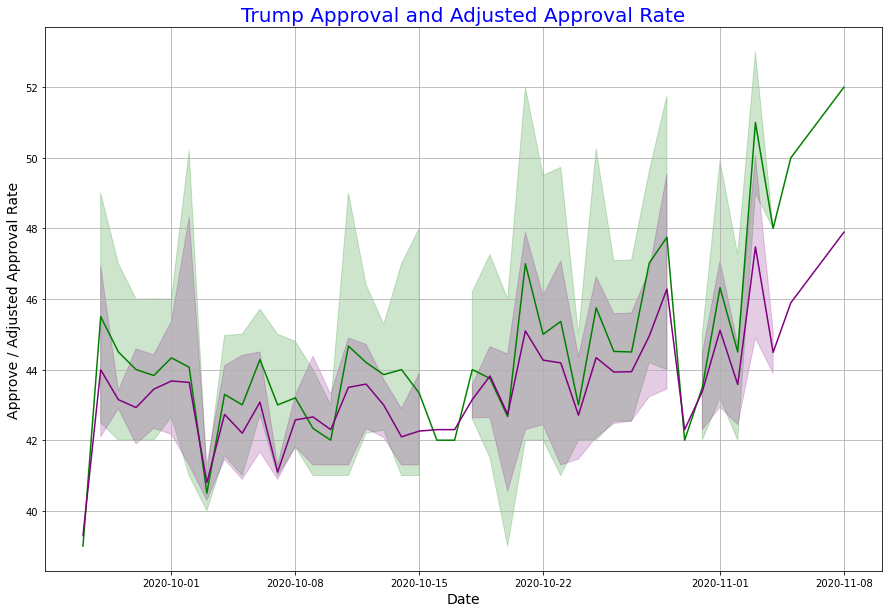

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Trump Approval and Adjusted Approval Rate", size = 20, color = "Blue")
sns.lineplot(x='enddate', y='approve', data = approve_data_sub_sorted, color = 'green')
sns.lineplot(x='enddate', y='adjusted_approve', data = approve_data_sub_sorted, color = 'purple')
plt.ylabel('Approve / Adjusted Approval Rate', size=14)
plt.xlabel('Date', size=14)
plt.grid()
plt.show()

In [11]:
style.use('fivethirtyeight')

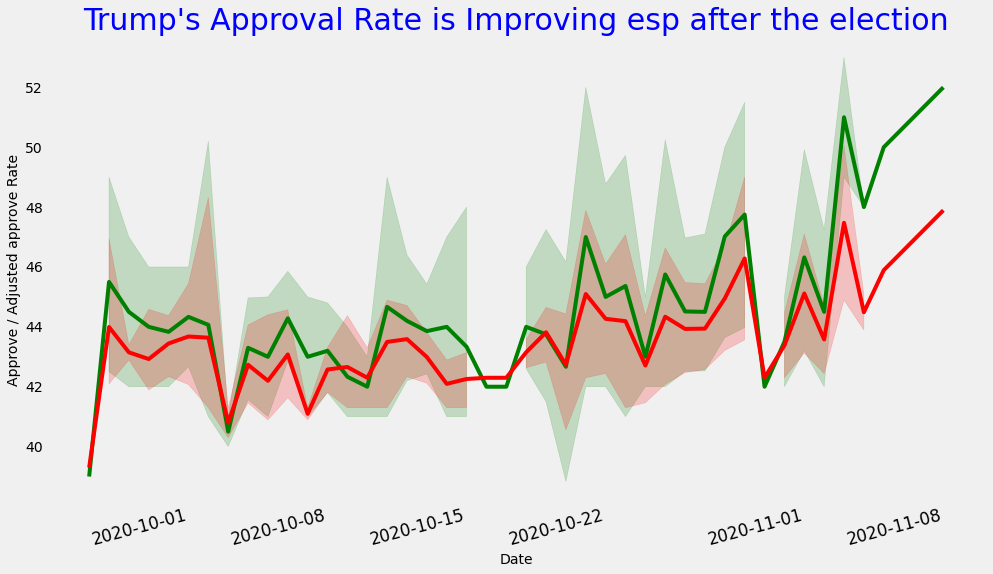

In [12]:
plt.figure(figsize=(15, 8))
plt.title("Trump's Approval Rate is Improving esp after the election", size = 30, color = "Blue")
sns.lineplot(x='enddate', y='approve', data = approve_data_sub_sorted, color = 'green')
sns.lineplot(x='enddate', y='adjusted_approve', data = approve_data_sub_sorted, color = 'red')
plt.grid()
plt.ylabel('Approve / Adjusted approve Rate', size=14)
plt.xlabel('Date', size=14)
#X-axis Tick labels 
plt.xticks(rotation=15, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')
plt.show()

In [13]:
approve_data1 = data[['approve','adjusted_approve']]
approve_data1

,approve,adjusted_approve
0,46.0,45.483105
1,45.0,45.747412
2,45.0,45.747412
3,42.1,43.312744
4,42.3,43.512744
...,...,...
16046,48.0,45.081642
16047,48.0,43.892594
16048,53.0,50.058109
16049,50.0,45.892594


In [14]:
approve_data

,enddate,approve,adjusted_approve
0,1/22/2017,46.0,45.483105
1,1/22/2017,45.0,45.747412
2,1/23/2017,45.0,45.747412
3,1/24/2017,42.1,43.312744
4,1/25/2017,42.3,43.512744
...,...,...,...
16046,11/4/2020,48.0,45.081642
16047,11/4/2020,48.0,43.892594
16048,11/3/2020,53.0,50.058109
16049,11/5/2020,50.0,45.892594


In [15]:
approve_data1

,approve,adjusted_approve
0,46.0,45.483105
1,45.0,45.747412
2,45.0,45.747412
3,42.1,43.312744
4,42.3,43.512744
...,...,...
16046,48.0,45.081642
16047,48.0,43.892594
16048,53.0,50.058109
16049,50.0,45.892594


In [16]:
approve_data_sub = approve_data[len(approve_data)-50:]
approve_data_sub.head()

,enddate,approve,adjusted_approve
16001,10/24/2020,42.00,42.299060
16002,10/22/2020,51.00,46.892594
16003,10/27/2020,44.00,43.950710
16004,10/23/2020,48.91,46.260402
16005,10/25/2020,41.00,41.299060


In [17]:
approve_data1_sub = approve_data1[len(approve_data)-50:]
approve_data1_sub.head()


,approve,adjusted_approve
16001,42.00,42.299060
16002,51.00,46.892594
16003,44.00,43.950710
16004,48.91,46.260402
16005,41.00,41.299060


In [18]:
#approve_plot = approve_data_sub.plot(x='enddate', y=approve_data1_sub, data = approve_data1_sub, figsize=(15, 10))
# approve_plot.axhline(y=0, alpha=0.7, linewidth=1.5, color='black')
# approve_plot.tick_params(axis='both', which='major', labelsize=18)
# approve_plot.set_xlim()
# approve_plot.set_yticklabels(labels=['not in use', '0 ', '10 ', '20 ', '30 ', '40 ', '50%'])
plt.show()